In [1]:
!nvidia-smi

Tue Aug 17 01:11:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html


In [3]:
pip list | grep torch

torch                         1.9.0+cu102
torchsummary                  1.5.1
torchtext                     0.10.0
torchvision                   0.10.0+cu102


In [4]:
import torch

In [5]:
import numpy as np

In [6]:
nums = torch.arange(9)
nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [7]:
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [8]:
nums.view(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [9]:
randoms = torch.rand((3,3))
randoms

tensor([[0.8907, 0.9022, 0.0880],
        [0.3085, 0.1814, 0.5328],
        [0.4692, 0.0471, 0.9228]])

In [10]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
torch.zeros_like(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [13]:
ones.shape

torch.Size([3, 3])

In [14]:
ones.size()

torch.Size([3, 3])

In [15]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [16]:
nums = nums.reshape((3,3))

In [17]:
nums + nums

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

In [18]:
result = torch.add(nums, 10)
result

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [19]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [20]:
range_nums = torch.arange(9).reshape(3,3)
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [21]:
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [22]:
range_nums.view(1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [23]:
range_nums.view(-1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [24]:
nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [25]:
nums[1]

tensor([3, 4, 5])

In [26]:
nums[1:,1:]

tensor([[4, 5],
        [7, 8]])

In [27]:
arr = np.array([1, 1, 1])
arr

array([1, 1, 1])

In [28]:
arr_torch = torch.from_numpy(arr)
arr_torch

tensor([1, 1, 1])

In [29]:
arr_torch.float()

tensor([1., 1., 1.])

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [31]:
device

'cuda'

In [32]:
arr_torch.to(device) #gpu 연산을 위해 보내는 과정

tensor([1, 1, 1], device='cuda:0')

In [33]:
arr_torch.to('cpu')

tensor([1, 1, 1])

In [34]:
x = torch.ones(2,2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [35]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [36]:
z = y*y*3
out = z.mean()

In [37]:
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [38]:
out.backward()

In [39]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [40]:
print(x.requires_grad)
print((x ** 2).requires_grad)

True
True


In [41]:
with torch.no_grad():
    print((x ** 2).requires_grad)

False


In [42]:
from torchvision import datasets, transforms

In [43]:
batch_size = 32
test_batch_size = 32

In [44]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                   transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,),std=(0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle=True

)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [45]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False, download = True, 
                   transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

In [46]:
images, labels = next(iter(train_loader))

In [47]:
images.shape

torch.Size([32, 1, 28, 28])

In [48]:
labels.shape

torch.Size([32])

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
images[0].shape

torch.Size([1, 28, 28])

In [51]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [52]:
image = torch_image.numpy()
image.shape

(28, 28)

In [53]:
label = labels[0].numpy()

In [54]:
label

array(3)

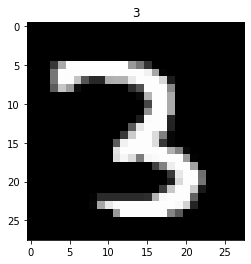

In [55]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()